In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [4]:
iris_data = pd.DataFrame(iris.data)

In [5]:
iris_data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_data.columns = iris.feature_names

In [7]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Steps :

1: Standardise the data

2: Convert the data into 2dimeansions ,it is in 4 dimension using PCA

3: clustering

In [9]:
#Standardisation
from sklearn.preprocessing import StandardScaler

In [10]:
scale = StandardScaler()

In [11]:
X_scaled = scale.fit_transform(iris_data)

In [13]:
X_scaled.shape

(150, 4)

In [14]:
## Apply PCA
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
pca_scaled = pca.fit_transform(X_scaled)

In [17]:
pca_scaled.shape

(150, 2)

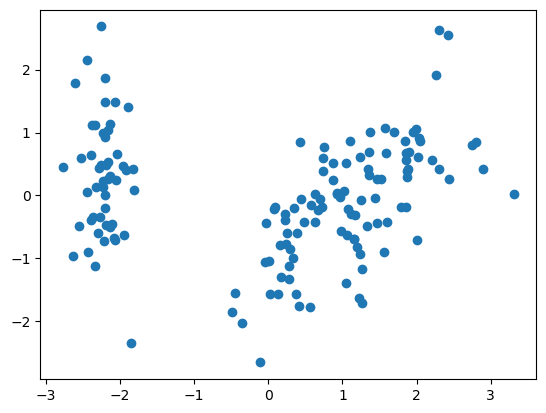

In [18]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

## Agloerative Clustering

In [19]:
## to construct dendrogram
import scipy.cluster.hierarchy as sc

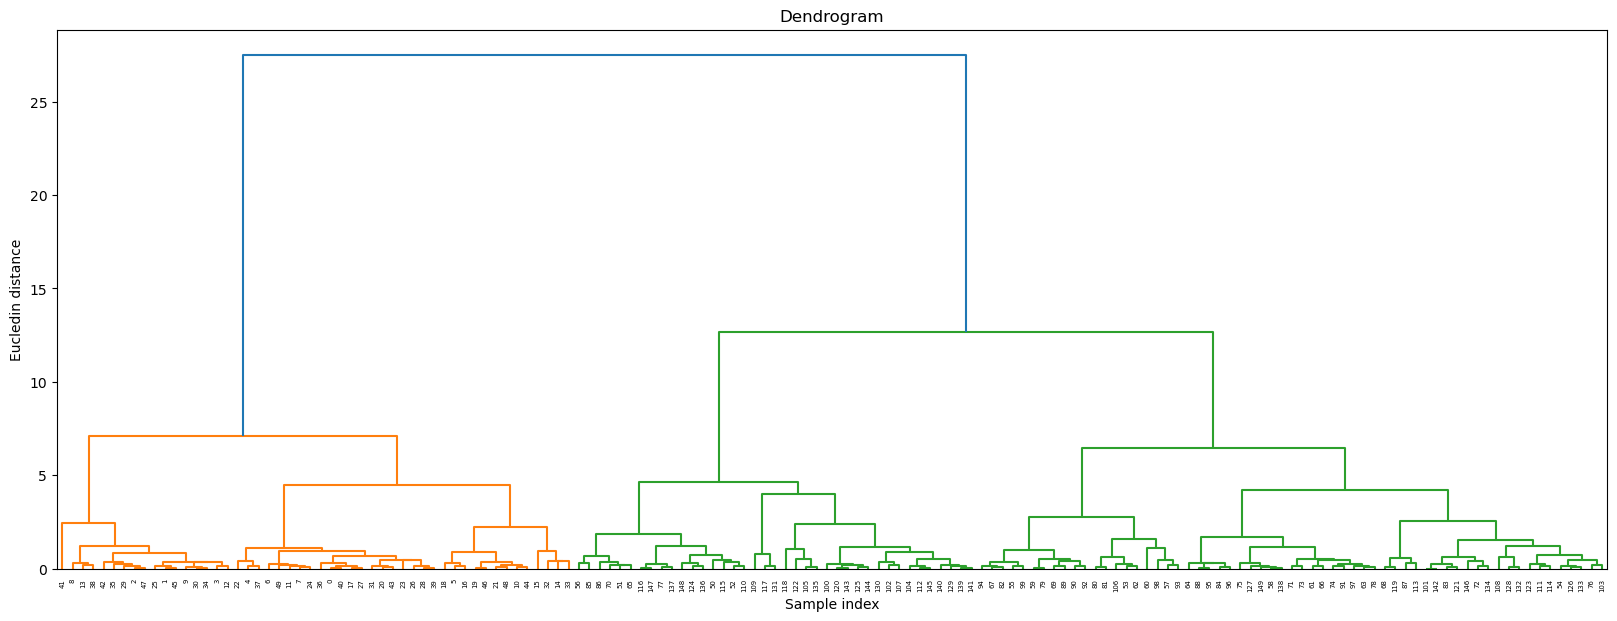

In [23]:
## Plot the dendrogram
plt.figure(figsize=(20,7))
plt.title("Dendrogram")

## Create dendrograms
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.xlabel("Sample index")
plt.ylabel("Eucledin distance")
plt.show()

In [24]:
### perform hierarchial clustering
from sklearn.cluster import AgglomerativeClustering

In [25]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [26]:
cluster.fit(pca_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [30]:
label = cluster.labels_

In [31]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

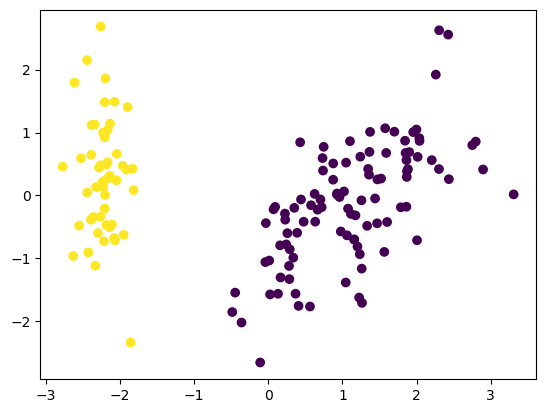

In [32]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=label)

In [38]:
## Sillhautte score
from sklearn.metrics import silhouette_score
sill_coef = []
for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled,agglo.labels_)
    sill_coef.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [39]:
sill_coef

[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

In [40]:
from kneed import KneeLocator

In [44]:
knee = KneeLocator(range(2,11),sill_coef)

In [45]:
knee.elbow

2

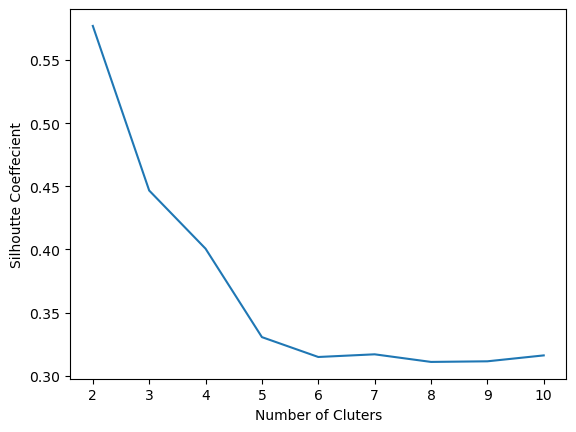

In [48]:
## plotting silhouette score
plt.plot(range(2,11),sill_coef)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()